In [2]:
# Python Notebook for PHYS 321B Computational Assignment #3

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib import rc
import scipy as sp

# extra stuff to make the plots look nice:

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["cmr10"],
          "font.size": 20
         }
plt.rcParams.update(params)
plt.rcParams['axes.formatter.use_mathtext'] = True

import os
os.environ["PATH"]
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Set tick parameters using rcParams
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['xtick.minor.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.rcParams['ytick.minor.width'] = 0.7

plt.rcParams['font.weight'] = 'bold'


1. In this assignment you are going to analyze the same system that you considered in problem 3 of the regular assignment. Do the following:

* Make a program informed by your work on computational assign- ment 2 which creates position-as-a-function-of-time data for the situation you analyzed in question 3. Make sure your time series is long enough for at least 6 periods of the slowest normal mode you predicted. Make sure your time step is small enough to avoid the problems you should have seen for large time steps.

* Run the program for some initial displacements of the masses, assuming they start at rest.
* Take the time series for each mass and do the following:
    - Calculate a sine transform by calculating 
$$
B_i(f)=\int x_i(t)sin(2\pi ft)dt 
$$
numerically for each mass.

    - Calculate a cosine transform by calculating 
$$
C_i(f)=\int x_i(t)cos(2\pi ft)dt 
$$
    numerically for each mass.

    - Calculate the quantity 
$$
D_i(f) = \sqrt{B_i^2(f) + C_i^2(f)}
$$

* Plot these three quantities for each mass on the same plot, and use the peaks to identify what the natural frequencies are. Are they the same for all three masses? Are they what was predicted?

* By looking at the maxima of D(f) (and extrema B and C) and comparing for each mass identify what the amplitude ratios A from problem 3 are experimentally. Are these what was predicted?

* Run the program again for another set of initial displacements to cross-check you get the same thing.

You should submit a plot of your time-series data for each mass, and plots of the transformed data which are appropriate to answer the question ‘did you get what you predicted’?

We will use the same algorithm as in problem 2:

$$
q(t_i+1) = q(t_i) + q'(t_i)\delta t
$$
$$
q'(t_i+1) = q'(t_i) + q''(t_i)\delta t 
$$

But this time we will have to do it for a set of coupled differential equations.

Our equations of motion can be written as follows:

### $m_1$:

$$
\ddot{x}_1 = -\frac{1}{3m} \left(5kx_1 - 4kx_2\right)
$$

### $m_2$:

$$
\ddot{x}_2 = -\frac{1}{m} \left(-4kx_1 + 6kx_2 -2kx_3\right)
$$

### $m_3$:

$$
\ddot{x}_3 = -\frac{1}{2m} \left( -2kx_2 +5kx_3\right)
$$



In [3]:
# constants in the problem:

# for ease of analysis we will set both k, m=1. The initial velocity and displacements are below:

x_ini1 = [0.2,0.1,0.0]
xp_ini1 = [0,0,0]

def solver(TS, N, x_ini=x_ini1, xp_ini=x_ini1, k=1,m=1): 
    '''
    Takes a time step TS, a number of 
    iterations N, a value for the vector
    of initial displacements and velocities
    and returns a time and displacement 
    array for each mass
    '''

    x1s = np.zeros(N); x2s=np.zeros(N);x3s=np.zeros(N)
    x1ps = np.zeros(N); x2ps=np.zeros(N); x3ps=np.zeros(N)
    ts = np.zeros(N)

    # iterates N times:
    for i in range(len(x1s)):
    
        # for first element of the arrays, use initial conditions:
        if i==0:
            # implements algorithm
            x1 = x_ini[0] + xp_ini[0] * TS
            x1p = xp_ini[0] -(1/3)*(5*x_ini[0]-4*x_ini[1])*TS
            
            x2 = x_ini[1] + xp_ini[1] * TS
            x2p = xp_ini[1] -(1/1)*((-4)*x_ini[0]+6*x_ini[1] -2*x_ini[2])*TS
            
            x3 = x_ini[2] + xp_ini[2] * TS
            x3p = xp_ini[2] -(1/2)*((-2)*x_ini[1]+5*x_ini[2])*TS
            
            # adds new values to arrays
            
            x1s[i] = x1; x1ps[i] = x1p
            x2s[i] = x2; x2ps[i] = x2p
            x3s[i] = x3; x3ps[i] = x3p
            
            ts[i]=0
            
        # for all others use the last iteration values to find next:
        else:
            # implements algorithm
            x1 = x1s[i-1] + x1ps[i-1] * TS
            x1p = x1ps[i-1] -(1/3)*(5*x1s[i-1]-4*x2s[i-1])*TS
            
            x2 = x2s[i-1] + x2ps[i-1] * TS
            x2p = x2ps[i-1] -(1/1)*((-4)*x1s[i-1]+6*x2s[i-1] -2*x3s[i-1])*TS
            
            x3 = x3s[i-1] + x3ps[i-1] * TS
            x3p = x3ps[i-1] -(1/2)*((-2)*x2s[i-1]+5*x3s[i-1])*TS
            
            # adds new values to arrays
            x1s[i] = x1; x1ps[i] = x1p
            x2s[i] = x2; x2ps[i] = x2p
            x3s[i] = x3; x3ps[i] = x3p
            
            ts[i]=i*TS
            
    return ts, x1s, x2s, x3s



In [4]:
# now lets use it: will play with the timestep and N to get at least 6 periods of the slowest normal mode:

ts = 1/200; n = 12000

data = solver(ts, n)

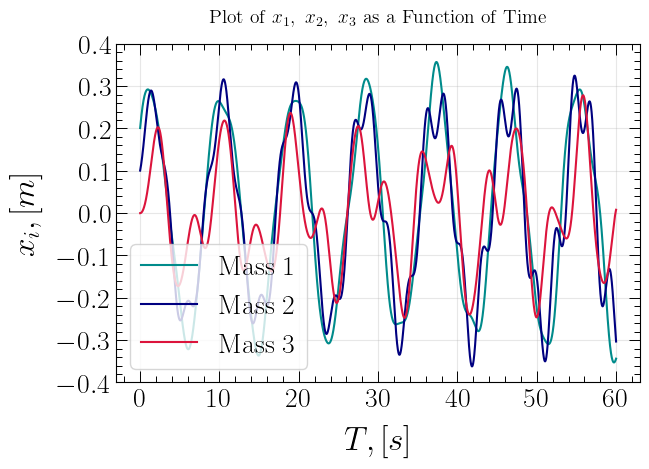

In [5]:
# plots the three mass positions as a function of time

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of $x_1, \ x_2, \ x_3$ as a Function of Time", pad = 15, fontsize=14)
ax1.set_ylabel(r"$x_i, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$T, [s]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(data[0],  data[1],c='darkcyan', label='Mass 1')
ax1.plot(data[0],  data[2],c='navy', label='Mass 2')
ax1.plot(data[0],  data[3],c='crimson', label='Mass 3')


# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.1));ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
ax1.xaxis.set_major_locator(MultipleLocator(10));ax1.xaxis.set_minor_locator(MultipleLocator(2))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-0.4, 0.4)
ax1.legend()
ax1.grid(True)
plt.show()


Now we need to compute the sine and cosine transforms of these quantities. The are define as 

$$
B_i(f)=\int x_i(t)sin(2\pi ft)dt 
$$



$$
C_i(f)=\int x_i(t)cos(2\pi ft)dt 
$$

To do this we will define first the integral for given t and x values and then iterate through to get the frequencies:


In [6]:
# we want a function that can be evaluated for different values
# of an input f. Kind of resembles what we did in assignment 1:


def sine_integral(f, t0, tf, N, xind=1):
    
    xi = data[xind]
    
    def integrand(t):

        index = int(t*(N)*ts)
        return xi[index] * np.sin(2*np.pi * f *t)
        
    #integral,err = sp.integrate.quad(integrand, t0,tf)
    delta_t = (tf-t0) / N
    midpoints = np.linspace(delta_t/2, tf - delta_t/2, N)
    
    integral = 0
    for i in range(N):

        int_val = integrand(midpoints[i])*delta_t
        integral += int_val
    
    return integral
    
sine_transform = np.vectorize(sine_integral)    

def cos_integral(f, t0, tf, N, xind=1):
    
    xi = data[xind]

    
    def integrand(t):

        index = int(t*(N)*ts)
        return xi[index] * np.cos(2*np.pi * f *t)
        
    #integral,err = sp.integrate.quad(integrand, t0,tf)
    delta_t = (tf-t0) / N
    midpoints = np.linspace(delta_t/2, tf - delta_t/2, N)
    
    integral = 0
    for i in range(N):

        int_val = integrand(midpoints[i])*delta_t
        integral += int_val
    
    return integral
    
cos_transform = np.vectorize(cos_integral)    
    

In [16]:
# we can now run our transforms for all three masses:

freqs = np.linspace(0, 0.2, int(n/10))

sin_x1 = sine_transform(freqs, data[0][0], data[0][-1],n, xind=1)
sin_x2 = sine_transform(freqs, data[0][0], data[0][-1],n, xind=2)
sin_x3 = sine_transform(freqs, data[0][0], data[0][-1],n, xind=3)

cos_x1 = cos_transform(freqs, data[0][0], data[0][-1],n, xind=1)
cos_x2 = cos_transform(freqs, data[0][0], data[0][-1],n, xind=2)
cos_x3 = cos_transform(freqs, data[0][0], data[0][-1],n, xind=3)


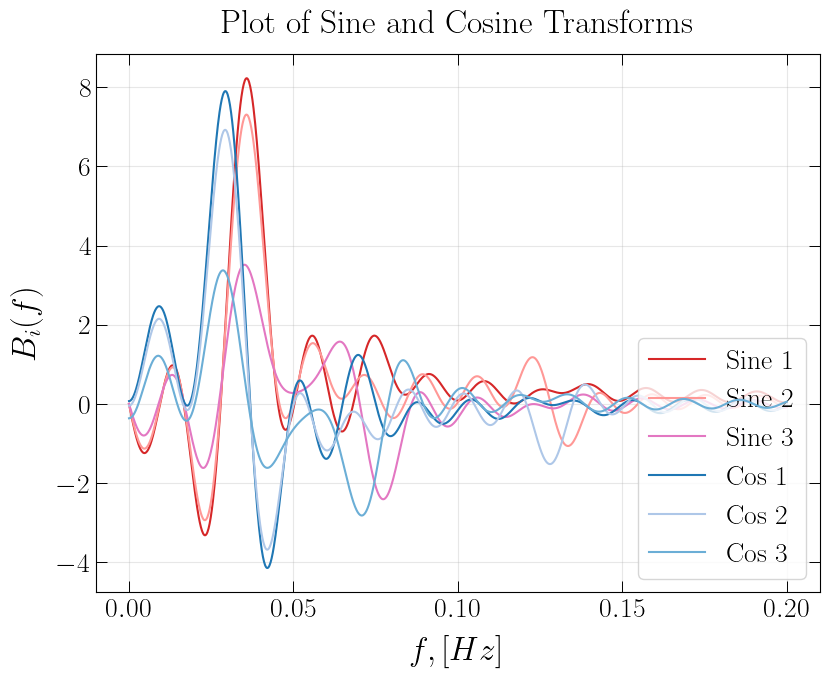

In [17]:
cc= ['#1f77b4', '#aec7e8', '#6baed6']  
sc = ['#d62728', '#ff9896', '#e377c2'] 

# initiates plotting parameters
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of Sine and Cosine Transforms", pad = 15, fontsize=24)
ax1.set_ylabel(r"$B_i(f)$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$f, [Hz]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(freqs,  sin_x1,c=sc[0], label='Sine 1')
ax1.plot(freqs,  sin_x2,c=sc[1], label='Sine 2')
ax1.plot(freqs,  sin_x3,c=sc[2], label='Sine 3')

ax1.plot(freqs,  cos_x1,c=cc[0], label='Cos 1')
ax1.plot(freqs,  cos_x2,c=cc[1], label='Cos 2')
ax1.plot(freqs,  cos_x3,c=cc[2], label='Cos 3', zorder=100)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(0.1));ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
#ax1.xaxis.set_major_locator(MultipleLocator(10));ax1.xaxis.set_minor_locator(MultipleLocator(1))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
#ax1.set_ylim(-0.13, 0.13)
ax1.legend(loc='lower right')
ax1.grid(True)
plt.show()


In [15]:
# the above is giving somewhat a weird result. There are so many
# variables that go into the convergence of the above code and
# so for completeness we will also compute the transforms using
# the scipy library:

sin_x1_sp = sp.fft.dst(data[1])
sin_x2_sp = sp.fft.dst(data[2])
sin_x3_sp = sp.fft.dst(data[3])

cos_x1_sp = sp.fft.dct(data[1])
cos_x2_sp = sp.fft.dct(data[2])
cos_x3_sp = sp.fft.dct(data[3])

fs = np.fft.rfftfreq(len(sin_x1_sp), d=np.abs(data[0][-1]-data[0][-2]))
df = fs[1] - fs[0]
fs2 = np.linspace(0, (12000-1)*df/2, 12000)

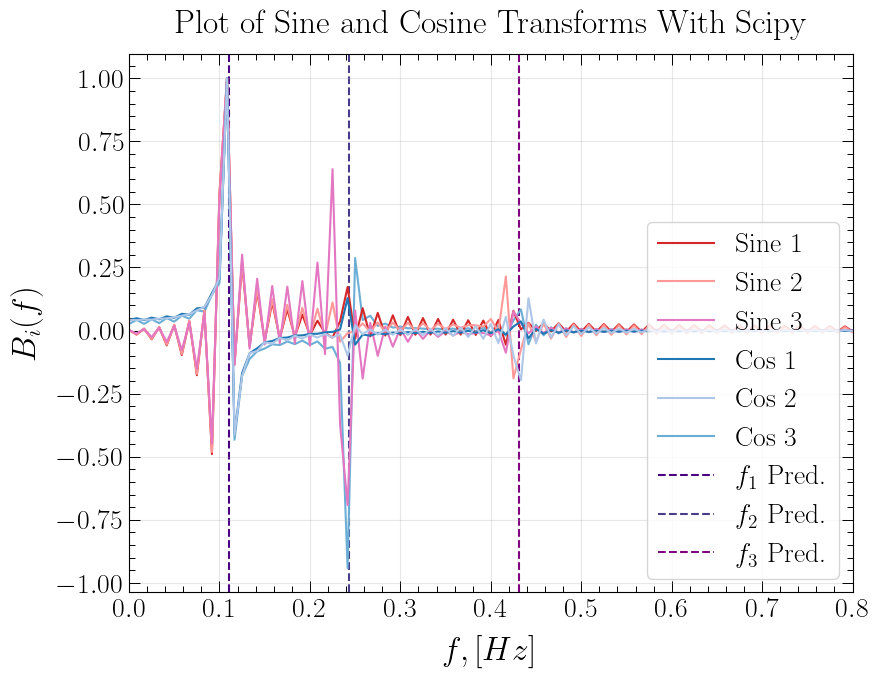

In [62]:
wc = ['#4B0082', '#483D8B', '#800080']
# initiates plotting parameters
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of Sine and Cosine Transforms With Scipy", pad = 15, fontsize=24)
ax1.set_ylabel(r"$B_i(f)$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$f, [Hz]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(fs2,sin_x1_sp/max(sin_x1_sp),c=sc[0], label='Sine 1')
ax1.plot(fs2,sin_x2_sp/max(sin_x2_sp),c=sc[1], label='Sine 2')
ax1.plot(fs2,sin_x3_sp/max(sin_x3_sp),c=sc[2], label='Sine 3')

ax1.plot(fs2,cos_x1_sp/max(cos_x1_sp),c=cc[0], label='Cos 1')
ax1.plot(fs2,cos_x2_sp/max(cos_x2_sp),c=cc[1], label='Cos 2')
ax1.plot(fs2,cos_x3_sp/max(cos_x3_sp),c=cc[2], label='Cos 3', zorder=1)

plt.axvline(x=np.sqrt(0.487)/(2*np.pi), color=wc[0], linestyle='--',zorder=0,label=r'$f_1$ Pred.')
plt.axvline(x=np.sqrt(2.329)/(2*np.pi), color=wc[1], linestyle='--',zorder=0,label=r'$f_2$ Pred.')
plt.axvline(x=np.sqrt(7.351)/(2*np.pi), color=wc[2], linestyle='--',zorder=0,label=r'$f_3$ Pred.')

# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.25));ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
ax1.xaxis.set_major_locator(MultipleLocator(0.1));ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
#ax1.set_ylim(-0.13, 0.13)
ax1.set_xlim(0,0.8)
ax1.legend(loc='lower right')
ax1.grid(True)
plt.show()


In [59]:
# we now want to find the quantity D_i = (B_i^2 + C_i^2)^1/2

def transform_mag(sine, cosine):
    
    D = np.zeros(len(sine))
    for i in range(len(sine)):
        D_i = np.sqrt(sine[i]**2 +cosine[i]**2)
        D[i] = D_i
        
    return D

In [138]:
mag_x1 = transform_mag(sin_x1_sp, cos_x1_sp)
mag_x2 = transform_mag(sin_x2_sp, cos_x2_sp)
mag_x3 = transform_mag(sin_x3_sp, cos_x3_sp)

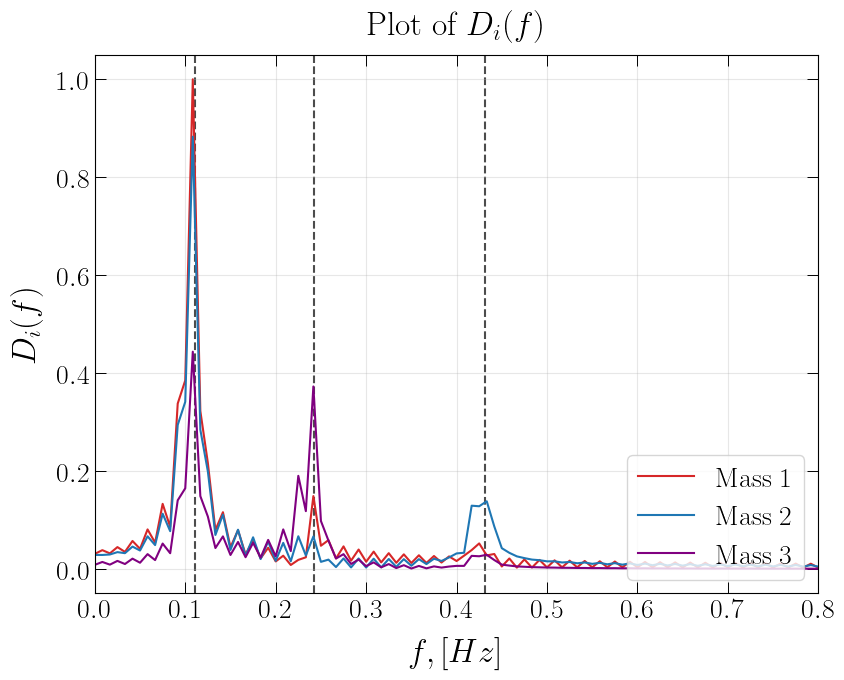

In [139]:
wc = ['#4B0082', '#483D8B', '#800080']
# initiates plotting parameters
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of $D_i(f)$", pad = 15, fontsize=24)
ax1.set_ylabel(r"$D_i(f)$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$f, [Hz]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(fs2,mag_x1/max(mag_x1),c=sc[0], label='Mass 1')
ax1.plot(fs2,mag_x2/max(mag_x1),c=cc[0], label='Mass 2')
ax1.plot(fs2,mag_x3/max(mag_x1),c=wc[2], label='Mass 3')

plt.axvline(x=np.sqrt(0.487)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)
plt.axvline(x=np.sqrt(2.329)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)
plt.axvline(x=np.sqrt(7.351)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(0.25));ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
#ax1.xaxis.set_major_locator(MultipleLocator(0.1));ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
#ax1.set_ylim(-0.13, 0.13)
ax1.set_xlim(0,0.8)
ax1.legend(loc='lower right')
ax1.grid(True)
plt.show()


From this plot it is clear that, for at least the first two normal modes, we have excellent agreement with the calculated values. The above plot is normalized to the maximum of the first mass. 

We can get the amplitude ratios by finding the maximum values near each of these peaks and dividing by the largest one. To get the sign of the amplitude we may look at the previous plot. 

Could write or use an extreme value algorithm or parse through the data. There are a lot of local minima so both seem tedious. Will use scipy and see what happens.


In [91]:
from scipy.signal import argrelextrema

x1_norm = mag_x1/max(mag_x1)
x2_norm = mag_x2/max(mag_x1)
x3_norm = mag_x3/max(mag_x1)

x1_ind = argrelextrema(x1_norm, np.greater,order=5)[0]
x1_maxes = x1_norm[x1_ind]

x2_ind = argrelextrema(x2_norm, np.greater,order=6)[0]
x2_maxes = x2_norm[x2_ind]

x3_ind = argrelextrema(x3_norm, np.greater,order=5)[0]
x3_maxes = x3_norm[x3_ind]

Now to get the ratios we will divide each of the items by the largest at that position:


In [107]:
# need to adjust the sign from the sine and cosine transforms: will be with respect to the largest one!


A1_ratios = [x1_maxes[0]/x1_maxes[0], x2_maxes[0]/x1_maxes[0],x3_maxes[0]/x1_maxes[0]]
A2_ratios = [-x1_maxes[1]/x3_maxes[1], x2_maxes[1]/x3_maxes[1],x3_maxes[1]/x3_maxes[1]]
A3_ratios = [-x1_maxes[2]/x2_maxes[2], x2_maxes[2]/x2_maxes[2],-x3_maxes[2]/x2_maxes[2]]

# need to adjust the sign from the sine and cosine transforms: will be with respect to the largest one!

print(f'A1 exp. = {A1_ratios}')
print(f'A2 exp. = {A2_ratios}')
print(f'A3 exp. = {A3_ratios}')
print()

# the values found from the analytic portion are:

print(f'A1 = {[1.000, 0.885, 0.440]}')
print(f'A2 = {[-0.344, 0.171, 1.000]}')
print(f'A3 = {[-0.235, 1.000, -0.206]}')

A1 exp. = [1.0, 0.8828338405699081, 0.4437370163527476]
A2 exp. = [-0.39950296956435594, 0.17939217319401798, 1.0]
A3 exp. = [-0.377818095235546, 1.0, -0.20991293519913434]

A1 = [1.0, 0.885, 0.44]
A2 = [-0.344, 0.171, 1.0]
A3 = [-0.235, 1.0, -0.206]


They are remarkably similar! That is sorta amazing considering what went into both sides of the problem. Apart from the first entry in A3 they agree in both sign and magnitude extremely well. With a longer run of the time series I am sure they would begin to match up even better. 

To answer the question 'did we get what was predicted?' I would say a resounding yes. 

Now we wish to recreate the results with a different initial condition:


In [134]:
# this time i will run it for longer to see if any of the noise
# is mitigated:

x_ini2 = [0.5,0,-0.5]

ts = 1/1000; n = 250000

data2 = solver(ts, n)

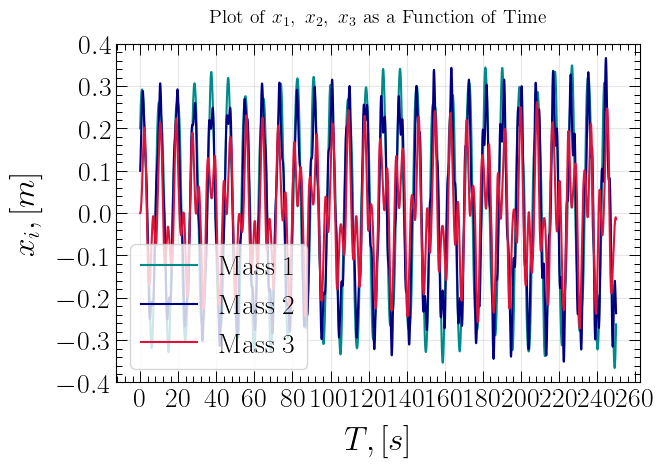

In [135]:
# plots the three mass positions as a function of time

# initiates plotting parameters
width=8;height=6;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of $x_1, \ x_2, \ x_3$ as a Function of Time", pad = 15, fontsize=14)
ax1.set_ylabel(r"$x_i, [m]$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$T, [s]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(data2[0],  data2[1],c='darkcyan', label='Mass 1')
ax1.plot(data2[0],  data2[2],c='navy', label='Mass 2')
ax1.plot(data2[0],  data2[3],c='crimson', label='Mass 3')


# ticks and legend:
ax1.yaxis.set_major_locator(MultipleLocator(0.1));ax1.yaxis.set_minor_locator(MultipleLocator(0.02))
ax1.xaxis.set_major_locator(MultipleLocator(20));ax1.xaxis.set_minor_locator(MultipleLocator(4))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
ax1.set_ylim(-0.4, 0.4)
ax1.legend()
ax1.grid(True)
plt.show()


In [136]:
sin_x1_sp2 = sp.fft.dst(data2[1])
sin_x2_sp2 = sp.fft.dst(data2[2])
sin_x3_sp2 = sp.fft.dst(data2[3])

cos_x1_sp2 = sp.fft.dct(data2[1])
cos_x2_sp2 = sp.fft.dct(data2[2])
cos_x3_sp2 = sp.fft.dct(data2[3])

fs_2 = np.fft.rfftfreq(len(sin_x1_sp2), d=np.abs(data2[0][-1]-data2[0][-2]))
df2 = fs_2[1] - fs_2[0]
fs2_2 = np.linspace(0, (250000-1)*df2/2, 250000)

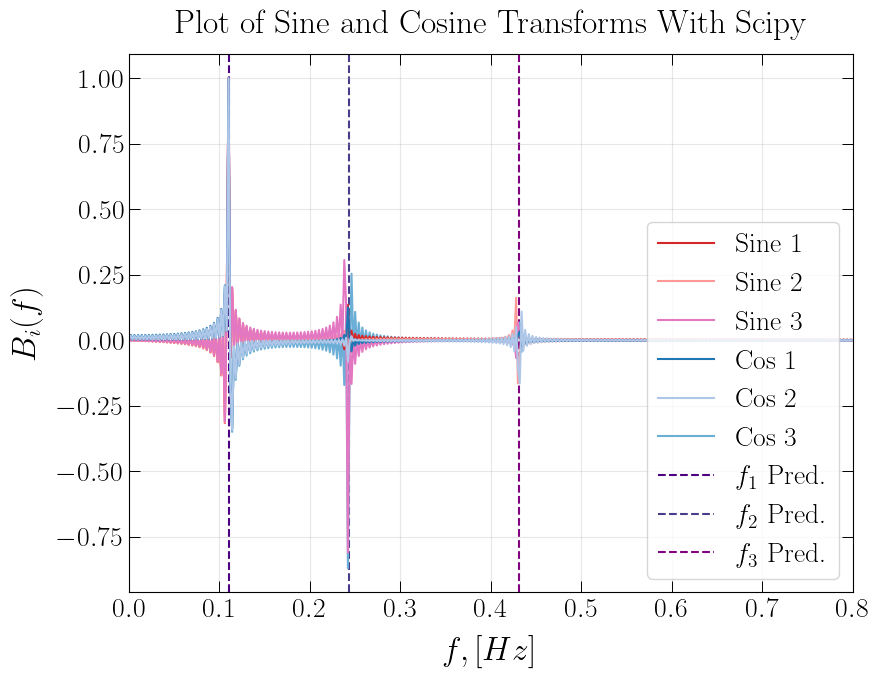

In [137]:
wc = ['#4B0082', '#483D8B', '#800080']
# initiates plotting parameters
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of Sine and Cosine Transforms With Scipy", pad = 15, fontsize=24)
ax1.set_ylabel(r"$B_i(f)$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$f, [Hz]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(fs2_2,sin_x1_sp2/max(sin_x1_sp2),c=sc[0], label='Sine 1')
ax1.plot(fs2_2,sin_x2_sp2/max(sin_x2_sp2),c=sc[1], label='Sine 2')
ax1.plot(fs2_2,sin_x3_sp2/max(sin_x3_sp2),c=sc[2], label='Sine 3')

ax1.plot(fs2_2,cos_x1_sp2/max(cos_x1_sp2),c=cc[0], label='Cos 1')
ax1.plot(fs2_2,cos_x2_sp2/max(cos_x2_sp2),c=cc[1], label='Cos 2')
ax1.plot(fs2_2,cos_x3_sp2/max(cos_x3_sp2),c=cc[2], label='Cos 3', zorder=1)

plt.axvline(x=np.sqrt(0.487)/(2*np.pi), color=wc[0], linestyle='--',zorder=0,label=r'$f_1$ Pred.')
plt.axvline(x=np.sqrt(2.329)/(2*np.pi), color=wc[1], linestyle='--',zorder=0,label=r'$f_2$ Pred.')
plt.axvline(x=np.sqrt(7.351)/(2*np.pi), color=wc[2], linestyle='--',zorder=0,label=r'$f_3$ Pred.')

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(0.25));ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
#ax1.xaxis.set_major_locator(MultipleLocator(0.1));ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
#ax1.set_ylim(-0.13, 0.13)
ax1.set_xlim(0,0.8)
ax1.legend(loc='lower right')
ax1.grid(True)
plt.show()


In [140]:
mag_x1_2 = transform_mag(sin_x1_sp2, cos_x1_sp2)
mag_x2_2 = transform_mag(sin_x2_sp2, cos_x2_sp2)
mag_x3_2 = transform_mag(sin_x3_sp2, cos_x3_sp2)

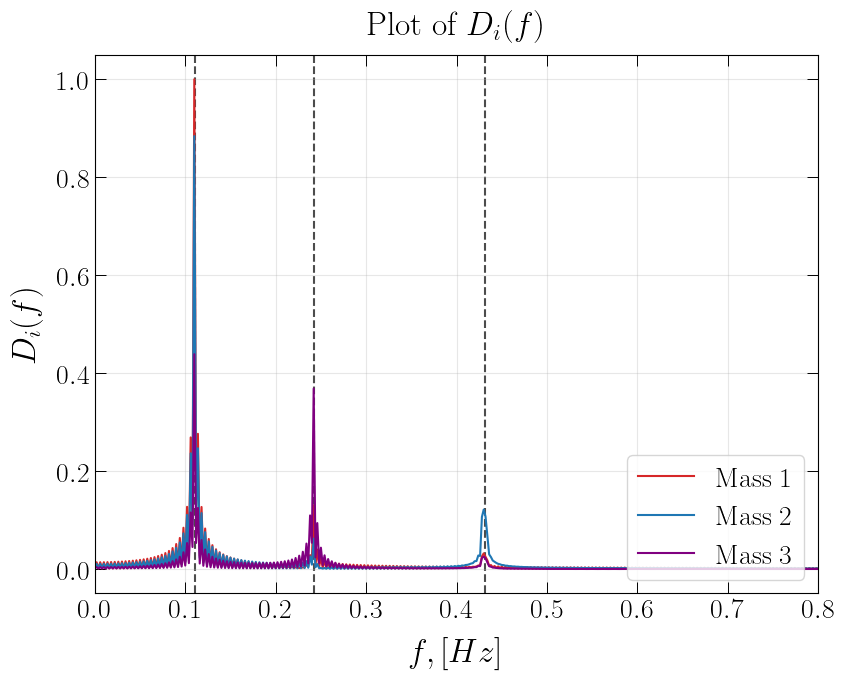

In [141]:
wc = ['#4B0082', '#483D8B', '#800080']
# initiates plotting parameters
width=10;height=8;ff, ax1 = plt.subplots(1,1);ff.set_figwidth(width);ff.set_figheight(height);ff.tight_layout(pad=4.0)

ax1.set_title(r"Plot of $D_i(f)$", pad = 15, fontsize=24)
ax1.set_ylabel(r"$D_i(f)$",labelpad =10, fontsize=24)
ax1.set_xlabel(r"$f, [Hz]$",labelpad =10,fontsize=24)

# actual plots:

ax1.plot(fs2_2,mag_x1_2/max(mag_x1_2),c=sc[0], label='Mass 1')
ax1.plot(fs2_2,mag_x2_2/max(mag_x1_2),c=cc[0], label='Mass 2')
ax1.plot(fs2_2,mag_x3_2/max(mag_x1_2),c=wc[2], label='Mass 3')

plt.axvline(x=np.sqrt(0.487)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)
plt.axvline(x=np.sqrt(2.329)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)
plt.axvline(x=np.sqrt(7.351)/(2*np.pi), color='k', linestyle='--',zorder=0,alpha=0.7)

# ticks and legend:
#ax1.yaxis.set_major_locator(MultipleLocator(0.25));ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
#ax1.xaxis.set_major_locator(MultipleLocator(0.1));ax1.xaxis.set_minor_locator(MultipleLocator(0.02))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.grid(True, alpha=0.3, zorder=10)
#ax1.legend( prop={'size': 12}, loc='lower right')
#ax1.set_ylim(-0.13, 0.13)
ax1.set_xlim(0,0.8)
ax1.legend(loc='lower right')
ax1.grid(True)
plt.show()


In [188]:
from scipy.signal import argrelextrema

x1_norm2 = mag_x1_2/max(mag_x1_2)
x2_norm2 = mag_x2_2/max(mag_x1_2)
x3_norm2 = mag_x3_2/max(mag_x1_2)

x1_ind2 = argrelextrema(x1_norm2, np.greater,order=5)[0]
x1_maxes2 = x1_norm2[x1_ind2]

x2_ind2 = argrelextrema(x2_norm2, np.greater,order=25)[0]
x2_maxes2 = x2_norm2[x2_ind2]

x3_ind2 = argrelextrema(x3_norm2, np.greater,order=64)[0]
x3_maxes2 = x3_norm2[x3_ind2]

In [190]:
A1_ratios2 = [x1_maxes2[0]/x1_maxes2[0], x2_maxes2[0]/x1_maxes2[0],x3_maxes2[0]/x1_maxes2[0]]
A2_ratios2 = [-x1_maxes2[1]/x3_maxes2[1], x2_maxes2[1]/x3_maxes2[1],x3_maxes2[1]/x3_maxes2[1]]
A3_ratios2 = [-x1_maxes2[2]/x2_maxes2[2], x2_maxes2[2]/x2_maxes2[2],-x3_maxes2[2]/x2_maxes2[2]]

# need to adjust the sign from the sine and cosine transforms: will be with respect to the largest one!

print(f'A1 exp. = {A1_ratios2}')
print(f'A2 exp. = {A2_ratios2}')
print(f'A3 exp. = {A3_ratios2}')
print()

# the values found from the analytic portion are:

print(f'A1 = {[1.000, 0.885, 0.440]}')
print(f'A2 = {[-0.344, 0.171, 1.000]}')
print(f'A3 = {[-0.235, 1.000, -0.206]}')

A1 exp. = [1.0, 0.8839139424572554, 0.43864377177281505]
A2 exp. = [-0.35232757309920504, 0.16853644851476787, 1.0]
A3 exp. = [-0.26319927553887956, 1.0, -0.2092272294051142]

A1 = [1.0, 0.885, 0.44]
A2 = [-0.344, 0.171, 1.0]
A3 = [-0.235, 1.0, -0.206]


These are even closer to what was predicted! That is fantastic. I assume that further running the code longer would consequently converge to the expected values (Although they are three digit estimates themselves). 